## **The Cox-Ross-Rubinstein Model**

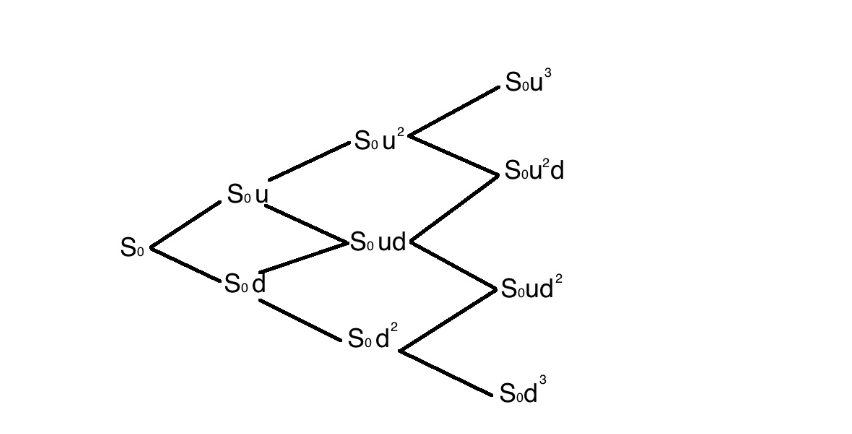

1. Let's consider the n-periods binomial model defined by the coefficients $S_0>0$ and $T>0$.

  $u = \exp(bh_n+\sigma \sqrt h_n)$ ;
  $d = \exp(bh_n-\sigma \sqrt h_n)$ ;
  $h_n := \frac{T}{n} $

    $\sigma>0$ and $b\geq0$

    a) Build the function $Sn(T, n, \sigma, j)$ which returns the vector $S^n_j$, vector in $\mathbb R^{j+1}$  of possible prices at time j defined by $S^n_j(i) = S_0u^{j-i}d^i$, $i=0,\ldots,j$

  By using the notations of the course (Chap 2 page 24), we have:
    
  The price process of the risky asset $S^n = \{S^n_0, \ldots, S^n_n\}$ is such that $S^n_j = S_0\exp\left(jb_n + \sigma_n\sum_{l=1}^j Z_l \right)$ at time $j$, where the $Z_l$ are such that
$$
    \mathbb P[Z_l = -1] = \mathbb P[Z_l = 1] = 1/2.
$$

Thus, in the definition $S^n_j(i) = S_0u^{j-i}d^i = S_0\exp\left(jb_n + \sigma_n(j - 2i)\right)$, $i$ is the number of $l\in\{0,\ldots,j\}$ such that $Z_l = -1$.

In [ ]:
import numpy as np
sigma = 0.3
r = 0.05
b = 0.05
S0 = 100
T = 2
n = 50
"""
First of all, we are going to build a function called computecoeff()
to compute the coefficients u and d
"""
def computecoeff(T, n, b, sigma):
  hn = T/n
  u = np.exp(b*hn + sigma*np.sqrt(hn))
  d = np.exp(b*hn - sigma*np.sqrt(hn))
  return u,d

def Sn(S, T, n, b, sigma, j):
  """
    Vector of all possible prices for the option of maturity T, at time j.
  """
  u, d = computecoeff(T, n, b, sigma)
  indices = np.arange(0, j+1)
  return S*np.power(u, j-indices)*np.power(d, indices)

###Computation

j = 5
snj = Sn(S0, T, n, b, sigma, j)
print(snj)

[136.34251141 120.92495977 107.25081813  95.12294245  84.36648166
  74.82635676]


1b) Consider a European call option with maturity T and strike $K \in \mathbb R_+$. Build a function Payoffn(T, n, b, sigma, K) which returns the payoff vector of the option at maturity.

In [ ]:
def Payoffn(S, T, n, b, sigma, K):
  """
    This function computes the payoff vector of an European call option
    with maturity T and Strike K
  """
  # At maturity, j=n
  snT = Sn(S, T, n, b, sigma, n)
  delta = snT - K
  t = np.stack([delta, np.zeros_like(delta)]) #Join the two NumPy arrays
  return np.max(t, 0) #Take the maximum wrt the first dimension

K = 80
Payoffn(S0, T, n, b, sigma, K)

array([2139.79512814, 1888.78166448, 1666.15269366, 1468.69850963,
       1293.57235851, 1138.24939607, 1000.49028639,  878.30891668,
        769.94376289,  673.83249337,  588.58944423,  512.98564186,
        445.93108444,  386.4590271 ,  333.71204403,  286.92966676,
        245.43742029,  208.63709893,  175.99814183,  147.04998375,
        121.37527075,   98.60384308,   78.4073985 ,   60.49475906,
         44.60767306,   30.51709181,   18.01986733,    6.93582354,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ])

c) Let $r\geq0$ be a constant interest rate. Build the function Calln(T, n, r, b, sigma, K) which returns at time zero the price of the European call option

Let $N = \sum_l \frac{1+Z_l}{2}\in\{0,\ldots,j\}$ be the number of $l\in\{0,\ldots,n\}$ such that $Z_l = -1$. It follows the binomial distribution $\mathbb B(n,1/2)$ for the standard probability law $\mathbb P$.

Under the no-risk probability $\mathbb Q_n$ and conditionally to the knowledge of the price process up to time $j=k$, we have $S^n_{k+1} = u S^n_{k}$ with probability $q_n$ because it is exactly the probability that $Z_n = 1$. Conversely
$$
    \mathbb Q_n \left[ S^n_{k+1} = d S^n_{k} \,|\, \mathbb F^n_{k} \right] = 1-q_n.
$$
The variable $N$ follows the binomial law $\mathbb B(n, 1-q_n)$ under $\mathbb Q_n$.

Thus,
$$
    \mathbb E^{\mathbb Q_n}_{k}\left[ B^n_{k+1} \right] = q_n(u S^n_{k} - K)^+ + (1 - q_n)(dS^n_{k} - K)^+
$$

In particular, the call option price is given by the total expectation
$$
    C = e^{-rT}\mathbb E^{\mathbb Q_n}\left[ \left(S_n^n - K\right)^+ \right] = e^{-rT} \mathbb B\cdot\verb|payoff(T, n, b, sigma, K)|
$$
where the vector $\mathbb B = \left\{\mathbb Q_n\left(N=i\right)\right\}_i$

In [ ]:
import scipy.stats
"""
Recall :The value of an option is equal to its expected payoff in the risk-neutral
universe, discounted at the risk-free rate.
"""
def Calln(S, T, n, r, b, sigma, K):
    """
    Compute the price of an European call option
    """
    # Price process at current time j
    u, d = computecoeff(T, n, b, sigma)
    hn = T/n
    rn = np.exp(r*hn)
    # Risk neutral probability
    qn = (rn - d)/(u - d)

    dist = scipy.stats.binom(n, 1-qn)
    # Vector BB of Q_n(N = i)
    weights = dist.pmf(np.arange(0, n+1))

    payoff = Payoffn(S, T, n, b, sigma, K)
    # Price is the adjusted expected value of the payoff
    # weighted by the binomial distribution B(n, qn)
    p = np.vdot(weights, payoff)

    return np.exp(-r*T)*p

print("The price of the European Call Option is:", Calln(S0, T, n, r, b, sigma, K))

The price of the European Call Option is: 32.22152694818214


1d) Build a function Deltan(T, n, r, b, σ, K, j) which returns the vector of all values of $θ_j^n$.

In [ ]:
def Deltan(S, T, n, r, b, sigma, K, j):
    """

    """
    assert j <= n
    # Price process at current time j
    snj  = Sn(S, T, n, b, sigma, j)
    # next expected prices
    snj1 = Sn(S, T, n, b, sigma, j+1)
    u, d = computecoeff(T, n, b, sigma)

    # Compute the call prices for every price instante in the future
    calls_new_ = [Calln(S, T, n, r, b, sigma, K) for S in snj1]

    thetnj = [
        (calls_new_[i] - calls_new_[i+1])/(u*snj[i] - d*snj[i]) for i in range(j+1)
    ]
    return thetnj

#Computation
Deltan(S0, T, n, r, b, sigma, K, 10)

[0.992571497311668,
 0.9842257355689892,
 0.9689734730219597,
 0.9432975564674966,
 0.9034223327494024,
 0.8462219583247718,
 0.7703593316512144,
 0.6772711698810407,
 0.5715411791255146,
 0.4603583806856625,
 0.35211237534597695]

1e) Examine the dependence effect of the strike K on the functions Calln, Deltan, and comment.

Text(0.5, 1.0, 'Price $C$ of the European call option\nas a function of strike $K$')

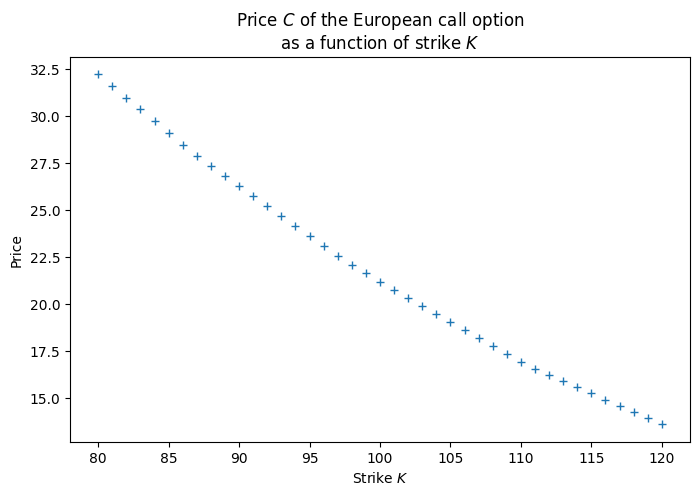

In [ ]:
import matplotlib.pyplot as plt
sigma = 0.3
r = b = 0.05
n = 50
K_values = [80+i for i in range(41)]
call_values = [Calln(S0, T, n, r, b, sigma, K) for K in K_values]

plt.figure(figsize=(8,5), dpi=100)
plt.plot(K_values, call_values, '+')
plt.xlabel("Strike $K$")
plt.ylabel("Price")
plt.title("Price $C$ of the European call option\nas a function of strike $K$")

Observation : The option price for the European call option is convex and decreasing in the strike $K$, as expected as per the properties of such call options.

Text(0.5, 1.0, 'Optimal hedge at time $j=0$\nas function of strike $K$')

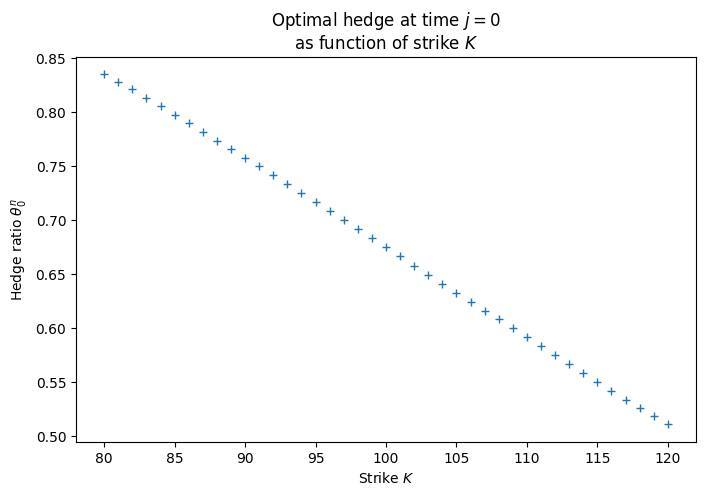

In [ ]:
start_hedges_ = [Deltan(S0, T, n, r, b, sigma, K, 0)[0] for K in K_values]

plt.figure(figsize=(8,5), dpi=100)
plt.plot(K_values, start_hedges_, '+')
plt.xlabel("Strike $K$")
plt.ylabel(r"Hedge ratio $\theta_0^n$")
plt.title("Optimal hedge at time $j=0$\nas function of strike $K$")

The starting optimal hedge ratio $\theta^n_0$ is decreasing with respect to the strike $K$. (The same can be said of the ratio at other times since we can take any time $j$ as a starting point). This behaviour is somewhat expected: the higher the strike, the more likely the option will have zero return and we will lose money: the optimal hedging strategy to cover that risk will contain less of the asset.

2) We consider now the limiting Black-Scholes formula

a) Build a function Call(T, r, σ, K) which returns the Black-Scholes price at time zero of the European call option

In the Black-Scholes model, the price at $t=0$ of a maturity $T$ and strike $K$ call option is given by
$$
    C = S\,\mathrm{erf}(d_+) - K\exp(-rT)\,\mathrm{erf}(d_-)
$$

where $\mathrm{erf}$ is the normal distribution's cumulative density function, and
$$
    d_{\pm} = \frac{\ln\left(Se^{rT}/K\right)}{\sigma\sqrt T} \pm \frac{\sigma\sqrt T}{2}
$$

In [ ]:
def computearg(sigma, T, s, k):
  """
  This function computes the arguments of the normal distribution's cumulative
  density function
  """
  v = sigma*sigma*T
  base = np.log(s/k)/np.sqrt(v)
  vari = np.sqrt(v)/2
  return base+vari, base-vari

def Call(S, T, r, sigma, K):
  dp, dm = computearg(sigma, T, S, K*np.exp(-r*T))
  return S0*scipy.stats.norm.cdf(dp) - K*np.exp(-r*T)*scipy.stats.norm.cdf(dm)

#Computation

K = 80
print("The price of the European Call Option is:", Call(S0, T, r, sigma, K))

The price of the European Call Option is: 32.19291006531836


2b) Compute err(T, n, r, b, $σ$, K)

In [ ]:
def err(S, T, n, r, sigma, K):
    return Calln(S, T, n, r, b, sigma, K)/Call(S, T, r, sigma, K) - 1

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

Nmax = 250
errors = [err(S0, T, ns, r, sigma, K) for ns in range(1, Nmax+1)]
fig = go.Figure()
fig.add_shape(go.layout.Shape(type="line", x0=0, x1=Nmax+1, y0=0, y1=0, line=dict(color="red")))
fig.add_trace(go.Scatter(x=list(range(1, Nmax+1)), y=errors, mode='markers', marker=dict(size=6, line=dict(color='black'))))
fig.update_layout(
    title="Error between Cox-Ross-Rubinstein at time resolution n vs Black-Scholes model",
    xaxis_title="CRR time sample size n",
    yaxis_title="Error",
    width=1000,
    height=500,
)

fig.show()

**Conclusion** : We notice that the error diminishes rapidly, consistently staying below 0.5% by the time we reach n=150. From this, we can deduce that the Cox-Ross-Rubinstein model converges to the Black-Scholes model at a reasonably fast rate.




